## We are a team about to buy some players for the new season and wonder...who are the players with the lowest possible market price and the highest level of overall skills? What are the nationalities and best ages to sign on these players? 
Departing from a complete set of records for more than 17.000 players, we are going to use data analysis techniques to find out. Assuming that all the players in our data are available for purchase, who are the best players at the best price in the market, right now?


![Image of Yaktocat](http://worldsoccertalk.com/wp-content/uploads/2013/06/international-soccer-ball1.jpg)

## Opening and cleansing the data. Our original database contains +17000 players with +70 columns including personal skills, nationality, age, etc...for each player

In [1]:
#opening the file and previewing it
import pandas as pd
import numpy as np
ply = pd.read_csv('CompleteDataset_fifa_football_players.csv', low_memory = False, )
ply.head(2)


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0


In [2]:
#checking for null values
ply.isnull().count()

Unnamed: 0             17981
Name                   17981
Age                    17981
Photo                  17981
Nationality            17981
Flag                   17981
Overall                17981
Potential              17981
Club                   17981
Club Logo              17981
Value                  17981
Wage                   17981
Special                17981
Acceleration           17981
Aggression             17981
Agility                17981
Balance                17981
Ball control           17981
Composure              17981
Crossing               17981
Curve                  17981
Dribbling              17981
Finishing              17981
Free kick accuracy     17981
GK diving              17981
GK handling            17981
GK kicking             17981
GK positioning         17981
GK reflexes            17981
Heading accuracy       17981
                       ...  
Vision                 17981
Volleys                17981
CAM                    17981
CB            

In [3]:
#we drop missing data rows
ply.dropna(inplace = True)
ply.shape

(15746, 75)

In [4]:
#type of data?
ply.dtypes.describe()

count         75
unique         3
top       object
freq          43
dtype: object

In [5]:
#what's the name and type of each column?
ply.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15746 entries, 0 to 17980
Data columns (total 75 columns):
Unnamed: 0             15746 non-null int64
Name                   15746 non-null object
Age                    15746 non-null int64
Photo                  15746 non-null object
Nationality            15746 non-null object
Flag                   15746 non-null object
Overall                15746 non-null int64
Potential              15746 non-null int64
Club                   15746 non-null object
Club Logo              15746 non-null object
Value                  15746 non-null object
Wage                   15746 non-null object
Special                15746 non-null int64
Acceleration           15746 non-null object
Aggression             15746 non-null object
Agility                15746 non-null object
Balance                15746 non-null object
Ball control           15746 non-null object
Composure              15746 non-null object
Crossing               15746 non-null obj

## First glimpse into the data. Any highly visible correlations that stand out?

# General age distribution of players in our initial database

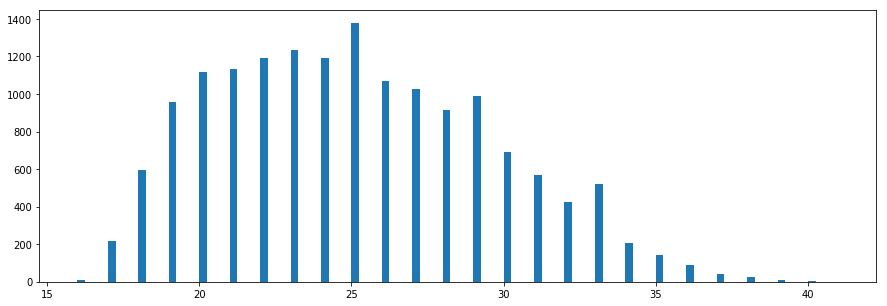

In [6]:
#what's the age distribution for all players?
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,5))
plt.hist(ply.Age, bins = 100)
plt.title = ('Distribution by age')
plt.xlabel = ('Player name')
plt.ylabel = ('Age')


In [7]:
#checking all column names
ply.columns


Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [8]:
#selecting only the columns that interest us, mainly regarding physical skill
columns = ['Name', 'Age', 'Nationality', 'Overall','Club','Value', 'Wage',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy','Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']
df = ply[columns]
df.head()

,Name,Age,Nationality,Overall,Club,Value,Wage,Acceleration,Aggression,Agility,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,Cristiano Ronaldo,32,Portugal,94,Real Madrid CF,€95.5M,€565K,89,63,89,...,96,83,94,23,91,92,31,80,85,88
1,L. Messi,30,Argentina,93,FC Barcelona,€105M,€565K,92,48,90,...,95,88,85,26,87,73,28,59,90,85
2,Neymar,25,Brazil,92,Paris Saint-Germain,€123M,€280K,94,56,96,...,88,81,80,33,90,78,24,53,80,83
3,L. Suárez,30,Uruguay,92,FC Barcelona,€97M,€510K,88,78,86,...,93,83,87,38,77,89,45,80,84,88
5,R. Lewandowski,28,Poland,91,FC Bayern Munich,€92M,€355K,79,80,78,...,91,83,88,19,83,79,42,84,78,87


In [9]:
#What type of data is in the table we are working with?
df.dtypes

Name                  object
Age                    int64
Nationality           object
Overall                int64
Club                  object
Value                 object
Wage                  object
Acceleration          object
Aggression            object
Agility               object
Balance               object
Ball control          object
Composure             object
Crossing              object
Curve                 object
Dribbling             object
Finishing             object
Free kick accuracy    object
Heading accuracy      object
Interceptions         object
Jumping               object
Long passing          object
Long shots            object
Marking               object
Penalties             object
Positioning           object
Reactions             object
Short passing         object
Shot power            object
Sliding tackle        object
Sprint speed          object
Stamina               object
Standing tackle       object
Strength              object
Vision        

In [10]:
#Data cleaning: replace letters in wage and value columns
df = df.replace({
    'Value':'[A-Za-z]', 
    'Wage': '[A-Za-z]',
},'',regex = True)
df.head()

,Name,Age,Nationality,Overall,Club,Value,Wage,Acceleration,Aggression,Agility,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,Cristiano Ronaldo,32,Portugal,94,Real Madrid CF,€95.5,€565,89,63,89,...,96,83,94,23,91,92,31,80,85,88
1,L. Messi,30,Argentina,93,FC Barcelona,€105,€565,92,48,90,...,95,88,85,26,87,73,28,59,90,85
2,Neymar,25,Brazil,92,Paris Saint-Germain,€123,€280,94,56,96,...,88,81,80,33,90,78,24,53,80,83
3,L. Suárez,30,Uruguay,92,FC Barcelona,€97,€510,88,78,86,...,93,83,87,38,77,89,45,80,84,88
5,R. Lewandowski,28,Poland,91,FC Bayern Munich,€92,€355,79,80,78,...,91,83,88,19,83,79,42,84,78,87


In [11]:
def euro(cell):
    cell = cell.strip('€')
    return cell
df.Value = df.Value.apply(euro)
df.Wage = df.Wage.apply(euro)
df.head()

,Name,Age,Nationality,Overall,Club,Value,Wage,Acceleration,Aggression,Agility,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,Cristiano Ronaldo,32,Portugal,94,Real Madrid CF,95.5,565,89,63,89,...,96,83,94,23,91,92,31,80,85,88
1,L. Messi,30,Argentina,93,FC Barcelona,105,565,92,48,90,...,95,88,85,26,87,73,28,59,90,85
2,Neymar,25,Brazil,92,Paris Saint-Germain,123,280,94,56,96,...,88,81,80,33,90,78,24,53,80,83
3,L. Suárez,30,Uruguay,92,FC Barcelona,97,510,88,78,86,...,93,83,87,38,77,89,45,80,84,88
5,R. Lewandowski,28,Poland,91,FC Bayern Munich,92,355,79,80,78,...,91,83,88,19,83,79,42,84,78,87


In [12]:
#changing values to float to work better with them
df[['Value','Wage','Age','Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys']] = df[['Value','Wage','Age','Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys']].apply(pd.to_numeric, errors = 'coerce') 
df.dtypes

Name                   object
Age                     int64
Nationality            object
Overall                 int64
Club                   object
Value                 float64
Wage                    int64
Acceleration          float64
Aggression            float64
Agility               float64
Balance               float64
Ball control          float64
Composure             float64
Crossing              float64
Curve                 float64
Dribbling             float64
Finishing             float64
Free kick accuracy    float64
Heading accuracy      float64
Interceptions         float64
Jumping               float64
Long passing          float64
Long shots            float64
Marking               float64
Penalties             float64
Positioning           float64
Reactions             float64
Short passing         float64
Shot power            float64
Sliding tackle        float64
Sprint speed          float64
Stamina               float64
Standing tackle       float64
Strength  

# What makes a good player?

### In order to understand what makes a good player, we comparre the "Overall rating" column, with all other columns. The columns of skills with the highest correlations to "Overall rating"  are the ones we'll pay special attention to, when purchasing new players. Let's look at correlations in the data and dive deeper into the details we are looking for...

In [13]:
#evaluating correlations in the data
pd.set_option('display.max_columns', 100)
df.corr()

,Age,Overall,Value,Wage,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
Age,1.000000,0.462673,-0.056722,0.157753,-0.188495,0.394110,-0.009553,-0.081827,0.253642,0.462548,0.275578,0.268692,0.099804,0.145432,0.319455,0.344365,0.289405,0.173730,0.318211,0.271375,0.225809,0.248548,0.188379,0.468815,0.308955,0.299839,0.185022,-0.172567,0.208453,0.215194,0.343721,0.248581,0.237343
Overall,0.462673,1.000000,-0.267157,0.602925,0.172154,0.459049,0.251184,0.060151,0.706777,0.777221,0.498814,0.502020,0.494712,0.363120,0.464810,0.474583,0.344313,0.238304,0.579653,0.498033,0.251593,0.388549,0.431455,0.836988,0.701658,0.553286,0.226211,0.196383,0.456072,0.267754,0.347611,0.507348,0.441869
Value,-0.056722,-0.267157,1.000000,-0.279156,-0.025696,-0.100307,-0.056056,-0.032727,-0.184248,-0.233736,-0.129235,-0.156550,-0.147749,-0.119564,-0.143508,-0.111078,-0.069811,-0.049648,-0.154073,-0.142169,-0.037470,-0.133551,-0.137778,-0.246857,-0.181130,-0.161344,-0.045178,-0.037406,-0.069245,-0.053221,-0.034043,-0.161008,-0.151607
Wage,0.157753,0.602925,-0.279156,1.000000,0.134601,0.220402,0.166691,0.067558,0.435637,0.465659,0.292328,0.310724,0.333356,0.259131,0.275759,0.267716,0.158735,0.134660,0.332379,0.305171,0.098474,0.269533,0.293172,0.512003,0.417692,0.331937,0.106083,0.144375,0.241397,0.124656,0.158981,0.333549,0.305103
Acceleration,-0.188495,0.172154,-0.025696,0.134601,1.000000,-0.207131,0.718989,0.582133,0.381205,0.101194,0.430940,0.361821,0.556083,0.370023,0.219899,-0.306988,-0.261434,0.079693,0.076883,0.306615,-0.298013,0.215764,0.441081,0.129949,0.184762,0.213030,-0.265708,0.866453,0.280252,-0.290876,-0.360029,0.296400,0.317258
Aggression,0.394110,0.459049,-0.100307,0.220402,-0.207131,1.000000,-0.160604,-0.199668,0.124965,0.362392,0.106557,0.034373,-0.069992,-0.200458,0.086256,0.460145,0.651565,0.317888,0.342828,0.024163,0.604713,-0.084359,-0.069072,0.439417,0.292943,0.160802,0.594260,-0.160159,0.393605,0.620754,0.512043,0.056229,-0.068848
Agility,-0.009553,0.251184,-0.056056,0.166691,0.718989,-0.160604,1.000000,0.705978,0.547310,0.247018,0.542571,0.532434,0.662581,0.475289,0.406871,-0.331204,-0.220270,0.086540,0.275462,0.468417,-0.289745,0.336019,0.551751,0.251143,0.376095,0.329889,-0.266090,0.642678,0.279757,-0.278134,-0.427246,0.507169,0.454027
Balance,-0.081827,0.060151,-0.032727,0.067558,0.582133,-0.199668,0.705978,1.000000,0.364030,0.099270,0.434573,0.396815,0.497475,0.303090,0.313619,-0.455494,-0.174419,0.059994,0.212804,0.304364,-0.215619,0.223577,0.378145,0.095404,0.267597,0.166946,-0.176620,0.473094,0.144050,-0.203831,-0.602501,0.381529,0.295561
Ball control,0.253642,0.706777,-0.184248,0.435637,0.381205,0.124965,0.547310,0.364030,1.000000,0.654294,0.681632,0.724152,0.839512,0.644100,0.629131,0.073081,-0.014574,0.009998,0.628059,0.721263,-0.113453,0.561315,0.717268,0.631209,0.789112,0.662170,-0.113839,0.354822,0.336031,-0.088073,-0.043611,0.763331,0.656247
Composure,0.462548,0.777221,-0.233736,0.465659,0.101194,0.362392,0.247018,0.099270,0.654294,1.000000,0.458424,0.526116,0.478147,0.395588,0.495278,0.334827,0.235753,0.152025,0.559103,0.517245,0.147366,0.424571,0.455629,0.711505,0.645511,0.553226,0.125965,0.109083,0.342138,0.164485,0.246218,0.559182,0.490767


![Image of players](https://usatthebiglead.files.wordpress.com/2017/07/gettyimages-499271140.jpg?w=1000&h=522&crop=1?w=1000&crop=0)

# According to our data findings, the features with high correlation with "Overall rating" are age(.45), ball control(.45), composure(.62),curve(.41), long passing(.47), long shots(.41), reactions(.84), short passing(.48), shot power(.42) and vision(.47)

Now we'll therefore try to identify players that are undervalued in the market, 
presenting the best correlation between the highest possible score in the skills mentioned above, 
and the lowest possible current market value.
If we find such players, we can be sure to maximize our ROI whilst minimizing our risks,
even if we may have to resell the player at a latter date.

In [14]:
'''Let's now isolate the top players on its own dataframe, 
together with the most significant skills we need to analyze for each player.
This will help us find which players may be undervalued in the current market, in comparision with their skills'''
top = df[['Name','Age','Value','Wage','Nationality','Overall','Ball control','Composure','Curve','Long passing','Long shots','Reactions','Short passing','Shot power','Vision']]
top.head()

,Name,Age,Value,Wage,Nationality,Overall,Ball control,Composure,Curve,Long passing,Long shots,Reactions,Short passing,Shot power,Vision
0,Cristiano Ronaldo,32,95.5,565,Portugal,94,93.0,95.0,81.0,77.0,92.0,96.0,83.0,94.0,85.0
1,L. Messi,30,105.0,565,Argentina,93,95.0,96.0,89.0,87.0,88.0,95.0,88.0,85.0,90.0
2,Neymar,25,123.0,280,Brazil,92,95.0,92.0,81.0,75.0,77.0,88.0,81.0,80.0,80.0
3,L. Suárez,30,97.0,510,Uruguay,92,91.0,83.0,86.0,64.0,86.0,93.0,83.0,87.0,84.0
5,R. Lewandowski,28,92.0,355,Poland,91,89.0,87.0,77.0,65.0,83.0,91.0,83.0,88.0,78.0


## In order to compare the player with best overall skills against their market price, we create two new columns: 

- "Real rating" is equal to the average of all the skills of the player, divided by the nnumber of skills evaluated.

PROBLEM SOLVED DOING THIS: we ensure that we are dealing with REAL average of skills, regardless of the given overall rating ay say

- "Real price" is the average between the transfer value of the player, and his curent wages. Having this piece of data will prevent problems in case that there is a great difference between these two figures 

PROBLEM SOLVED DOING THIS: we ensure we don't have last minute surprises due to a bad calculations regarding the complete player expenditure, composed of transfer PLUS wages (e.g. the transger value of a player may be low but his expected wages high, so our savings at the time of buying him are lost to his monthly salary)

In [15]:
#we create the new column containing only the skills that really count for us
df['Real rating'] = (df['Age'] + df['Ball control'] +df['Composure'] +df['Curve'] +df['Long passing'] +df['Long shots'] +df['Reactions'] +df['Short passing'] +df['Shot power'] +df['Vision'])/10
df['Real rating'].head()

0    82.8
1    84.3
2    77.4
3    78.7
5    76.9
Name: Real rating, dtype: float64

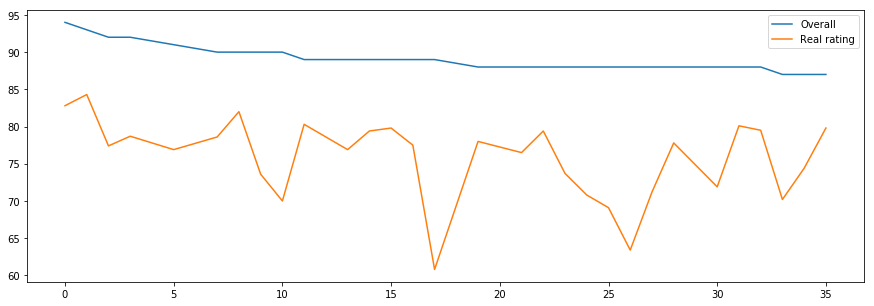

In [16]:
#Here we see the divergence between our new column, "Real rating" that considers only the few key skills most important to us,
#...and the "Overall" rating that was given to us in the data and possibly contains an average of ALL the skills, including the irrelevant ones 
# as we can see for example in player number 10, when only key skills are considered his rating goes remarkably down
df[['Overall','Real rating']].head(30).plot(figsize = (15,5))

In [17]:
#here we create the column 'Real price', that is the result of the price of acquisition of the player + the price of his wages for the first 12 months
df['Real price'] = (((df['Value']*1000000) + (df['Wage']*1000*12))/1000000) #PRICE IS IN MILLIONS OF EURO
df[['Name','Real price','Real rating']].head()

,Name,Real price,Real rating
0,Cristiano Ronaldo,102.28,82.8
1,L. Messi,111.78,84.3
2,Neymar,126.36,77.4
3,L. Suárez,103.12,78.7
5,R. Lewandowski,96.26,76.9


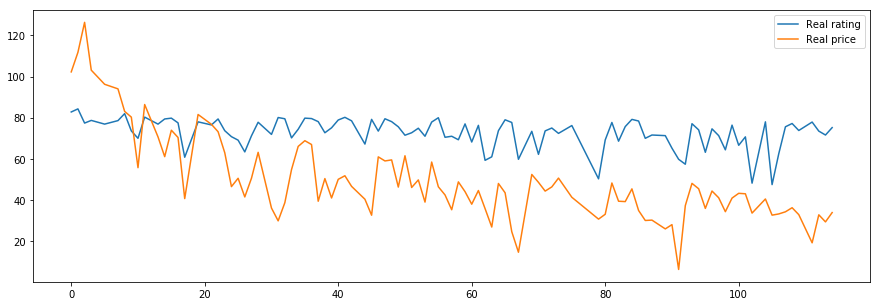

In [18]:
#here seeing "Real price" against "Real rating" we can begin to see what players are under or over-valued
#here we show the differente between those factors for the first 100 players
df[['Real rating','Real price']].head(100).plot(figsize = (15,5))

In [19]:
#Here we create a new column by substracting the real rating from the price of the player. 
#The higher this ratio, the better an opportunity the player is when we are buying him
#As we can see, the first names in the list see to be overvalued (negative "Opportunity value" means we pay more than their skills are worth)
df['Opportunity value'] = df['Real rating'] - df['Real price']
df[['Name','Real rating','Real price','Opportunity value']].head(50)

,Name,Real rating,Real price,Opportunity value
0,Cristiano Ronaldo,82.8,102.28,-19.48
1,L. Messi,84.3,111.78,-27.48
2,Neymar,77.4,126.36,-48.96
3,L. Suárez,78.7,103.12,-24.42
5,R. Lewandowski,76.9,96.26,-19.36
7,E. Hazard,78.6,94.04,-15.44
8,T. Kroos,82.0,83.08,-1.08
9,G. Higuaín,73.6,80.30,-6.70
10,Sergio Ramos,70.0,55.72,14.28
11,K. De Bruyne,80.3,86.42,-6.12


In [20]:
#There are only 16 players with "Opportunity value" scores over 70 points
df['Name'][df['Opportunity value'] > 70].describe()

count                16
unique               16
top       H. Medunjanin
freq                  1
Name: Name, dtype: object

In [21]:
#Here we can see a sample of 5 of them, together with their data
opt_table = df[['Name','Nationality','Real rating','Real price','Opportunity value']].sort_values(by = ['Opportunity value'] , ascending = False)
opt_table.dropna(inplace = True)
opt_table.head()

,Name,Nationality,Real rating,Real price,Opportunity value
383,D. Srna,Croatia,78.1,3.812,74.288
691,A. Pirlo,Italy,78.4,4.120,74.280
2224,B. Nivet,France,73.4,0.192,73.208
2011,F. Brienza,Italy,75.1,2.260,72.840
3309,M. Candelo,Colombia,72.5,0.024,72.476


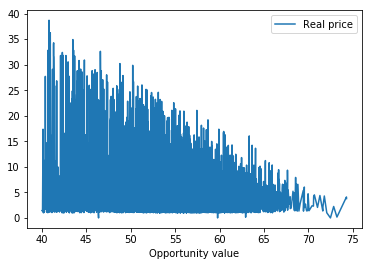

In [22]:
'''Once again here we do another graphic confirmation, in this case we can confirm 
our intuition regarding the difference between "Opportunity value" and "Real price"'''

opt_table[opt_table['Opportunity value'] > 40].plot(x = 'Opportunity value', y='Real price')


## There are 1613 players with "Opportunity value" above 60 points (max is 74.28). Thus, we should consider concentrating on finding and signing in those players for our team next season, as they are clearly the best value for money of the +17.000 players evaluated in this data analysis

In [23]:
#These are the top 200 players with a score over 60
pd.set_option('display.max_rows', 2000)
print(opt_table[opt_table['Opportunity value']> 60].count())
opt_table[opt_table['Opportunity value']> 60]
#pd.set_option('display.max_rows', None)

Name                 1613
Nationality          1613
Real rating          1613
Real price           1613
Opportunity value    1613
dtype: int64


,Name,Nationality,Real rating,Real price,Opportunity value
383,D. Srna,Croatia,78.1,3.812,74.288
691,A. Pirlo,Italy,78.4,4.120,74.280
2224,B. Nivet,France,73.4,0.192,73.208
2011,F. Brienza,Italy,75.1,2.260,72.840
3309,M. Candelo,Colombia,72.5,0.024,72.476
3437,O. Pérez,Argentina,73.1,1.036,72.064
693,E. Belözoğlu,Turkey,76.1,4.312,71.788
1818,H. Altıntop,Turkey,73.9,2.264,71.636
2674,K. Nakamura,Japan,73.0,1.384,71.616
1027,K. Källström,Sweden,75.7,4.408,71.292


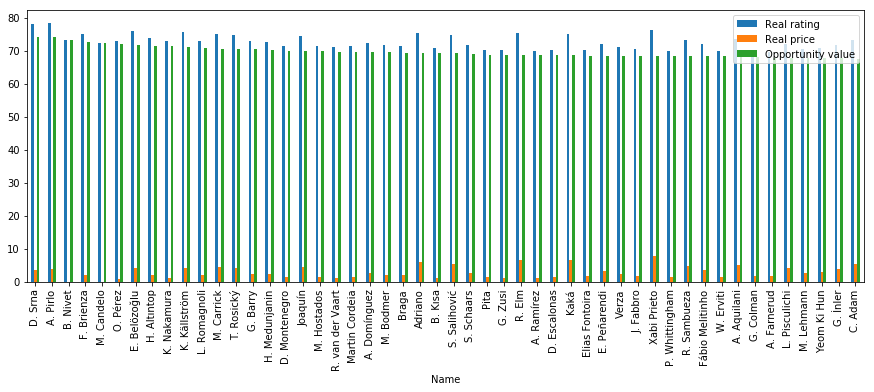

In [24]:
#Graphical representation of a sample of top players over 60 points
#This is a shortlist of 50 players we could start trying to sign onto our team

top_25pc = opt_table[opt_table['Opportunity value']> 60]
top_25pc.set_index('Name', inplace = True)
top_25pc.head(50).sort_values(by = 'Opportunity value', ascending = False).plot(kind='bar', figsize = (15,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A00878A748>,
      dtype=object)

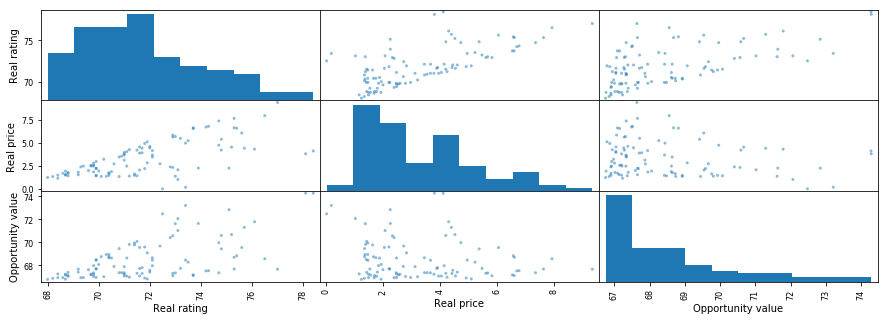

In [25]:
#As we can see, all data points are fairly spread. Thus, there are no visible highly linear correlations that stand out!
pd.plotting.scatter_matrix(opt_table.head(100), figsize = (15,5), diagonal = 'hist' )

# Since we are planning to go personally to buy the players with a value higher than 60 points, what countries should we visit first*? In order of number of players with best ratings, our winners are Brazil (146 players), Argentina (116 players), and Spain (109 players)
*Assuming that we can still find the players in their country of origin

![Image of travel](https://www.rentokil.com/blog/wp-content/uploads/2016/03/how-to-prevent-bed-bugs-when-travelling-v2.jpg)

In [26]:
top_25pc = opt_table[opt_table['Opportunity value']> 60]

top_25pc.groupby('Nationality').count().sort_values(by='Opportunity value', ascending = False)

,Name,Real rating,Real price,Opportunity value
Nationality,,,,
Brazil,146,146,146,146
Argentina,116,116,116,116
Spain,109,109,109,109
France,93,93,93,93
Chile,82,82,82,82
England,72,72,72,72
Italy,72,72,72,72
Portugal,69,69,69,69
Germany,65,65,65,65


## Using our expert data analysis skills we have not only found out what really makes a good player, but also which players are currently over and undervalued in the market, and where they are from.  This information will ensure that we get the best possible players for our team, at the lowest possible price, minimizing our financial risk and saving millions of dollars in the meantime!

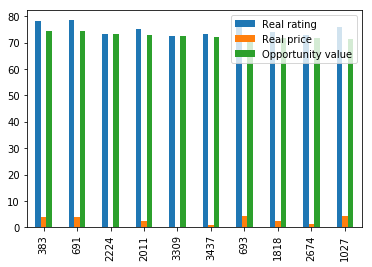

In [27]:
import matplotlib as plt
#plt.figure()
opt_table.head(10).plot.bar()

## ...and what's the best age for football players? According to our graphic analysis below, we should concentrate on hiring players of ages 25, 23, 24, 22 and 21, in this order, since these are the age brackets containing the most players with "overall" scores over 75 (Possible maximum score  = 91. Min score = 40)

Age
25    1378
23    1234
24    1193
22    1191
21    1131
Name: Overall, dtype: int64


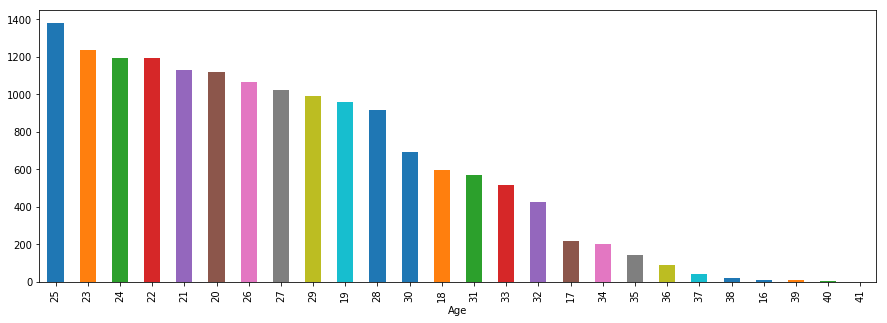

In [28]:
#Note: to calculate this we are using the initial "Overall" score, not the latter calculated "Opportunity value"

#ply.groupby('Overall')['Age'].head(130).describe()
ply.describe()
top_overall = ply[ply['Overall']> 75]
top_overall = ply.groupby('Age').count().sort_values(by='Overall', ascending = False)
print(top_overall['Overall'].head())
top_overall['Overall'].plot(kind = 'bar', figsize = (15,5))

Pending more information on the current personal circumstances and desires of players, contracts, clauses, etc... we already have all the data we need to effectively start searching for, and signing on, the very best players in the world, at the best possible prices.

Data analysis by JavierMarti.co.uk